In [ ]:
import io
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving final_test.csv to final_test (2).csv


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['final_test.csv']))

In [ ]:
df.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [ ]:
df.shape

(119734, 4)

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
numeric=['weight','age','height']

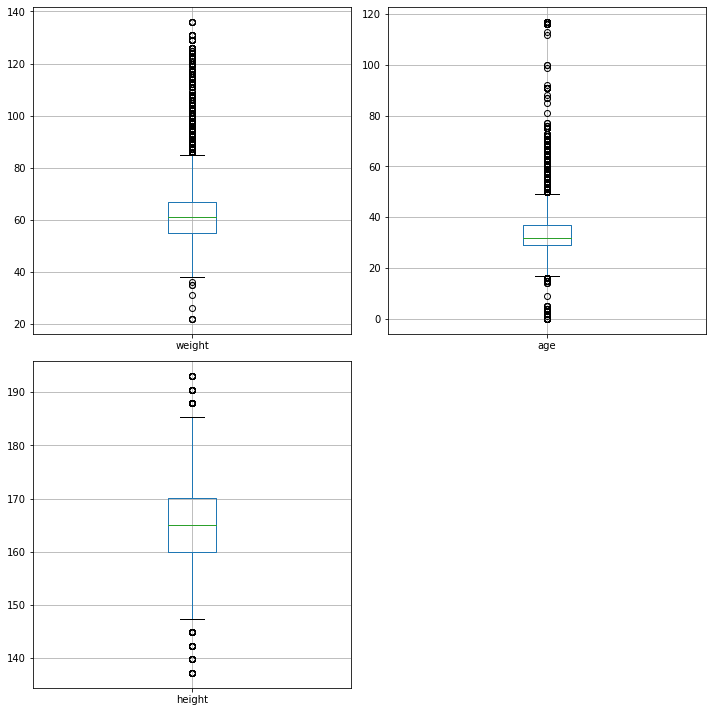

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(10,10))
for i,el in enumerate(list(df.columns.values)[:-1]):
    a = df.boxplot(el, ax=axes.flatten()[i])
fig.delaxes(axes[1,1]) # remove empty subplot
plt.tight_layout() 

plt.show()

In [ ]:
df.loc[df.weight==df.weight.quantile(0.25)].groupby(df['size']).median()

,weight,age,height
size,,,
L,55,38.0,162.56
M,55,33.0,165.10
S,55,31.0,165.10
XL,55,38.5,162.56
XXS,55,31.0,165.10
XXXL,55,46.0,162.56


try #1

In [ ]:
for i in numeric:
  print(i,":",df[i].quantile(0.25),df[i].quantile(0.75))

weight : 55.0 65.0
age : 29.0 37.0
height : 160.02 170.18


In [ ]:
def replace(group,k):
    mean, std = group.mean(), group.std()
    outliers = (group - mean).abs() > 3*std
    group[outliers] = k       # or "group[~outliers].mean()"
    return group

In [ ]:
df['weight']=replace(df.weight,65)
df['height']=replace(df.height,170)
df['age']=replace(df.age,37)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.p

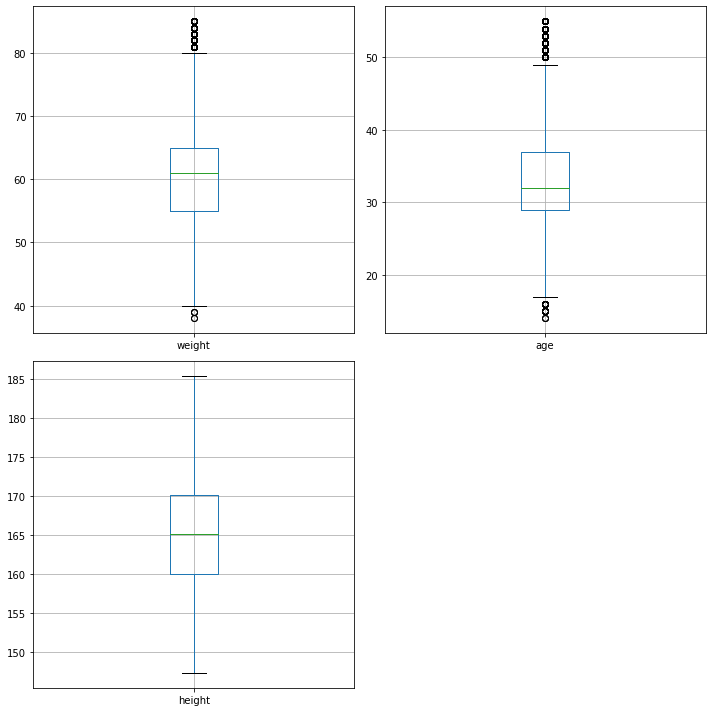

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(10,10))
for i,el in enumerate(list(df.columns.values)[:-1]):
    a = df.boxplot(el, ax=axes.flatten()[i])
fig.delaxes(axes[1,1]) # remove empty subplot
plt.tight_layout() 

plt.show()

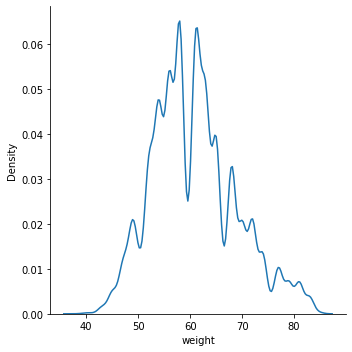

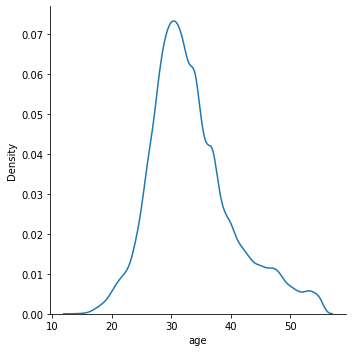

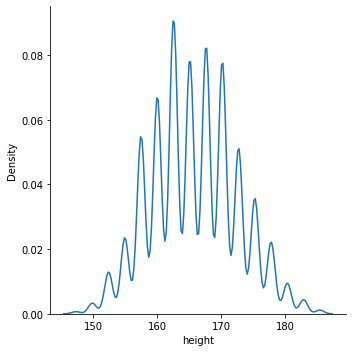

In [ ]:
for i in numeric:
  sns.displot(data=df,x=i,kind='kde')

In [ ]:
df.isna().sum()

weight    0
age       0
height    0
size      0
dtype: int64

In [ ]:
df['age']=df.age.fillna(df.age.median())
df['height']=df.height.fillna(df.height.mean())

In [ ]:
def to_int(x):
  if x.dtype=='object':
    x=LabelEncoder().fit_transform(x)
  return x

In [ ]:
df=df.apply(lambda x: to_int(x))

In [ ]:
x=df[numeric]
y=df['size']
xtr,xtst,ytr,ytst=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
tree_model=DecisionTreeClassifier()
tree_model.fit(xtr,ytr)
predicted_y = tree_model.predict(xtst)
accuracy_knn =tree_model.score(xtst,ytst)
print("tree accuracy:",accuracy_knn)
print(classification_report(ytst, predicted_y))

tree accuracy: 0.49294284680270595
              precision    recall  f1-score   support

           0       0.34      0.30      0.32      5342
           1       0.47      0.58      0.52      8853
           2       0.48      0.49      0.48      6584
           3       0.42      0.39      0.40      5672
           4       0.00      0.00      0.00        25
           5       0.54      0.38      0.44      3015
           6       0.73      0.68      0.70      6430

    accuracy                           0.49     35921
   macro avg       0.42      0.40      0.41     35921
weighted avg       0.50      0.49      0.49     35921



In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=11)
knn_model.fit(xtr,ytr)
predicted_y = knn_model.predict(xtst)
accuracy_knn = knn_model.score(xtst,ytst)
print("KNN accuracy:",accuracy_knn)
print(classification_report(ytst, predicted_y))

KNN accuracy: 0.48528715792990174
              precision    recall  f1-score   support

           0       0.32      0.31      0.32      5342
           1       0.46      0.56      0.51      8853
           2       0.48      0.46      0.47      6584
           3       0.41      0.36      0.38      5672
           4       0.00      0.00      0.00        25
           5       0.53      0.40      0.46      3015
           6       0.71      0.71      0.71      6430

    accuracy                           0.49     35921
   macro avg       0.41      0.40      0.41     35921
weighted avg       0.48      0.49      0.48     35921



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
knn_model.predict([[70,20,180]])

array([3])

try #2


In [ ]:
df.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

(27404, 4)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


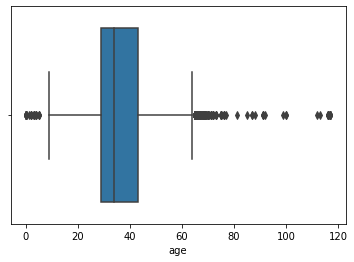

In [ ]:
sns.boxplot(df.age)

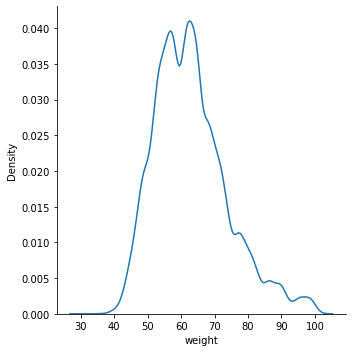

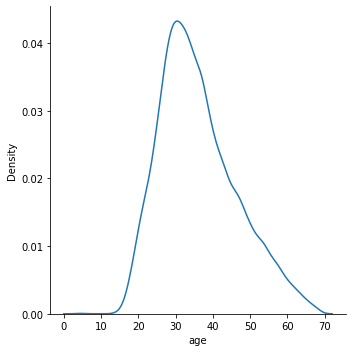

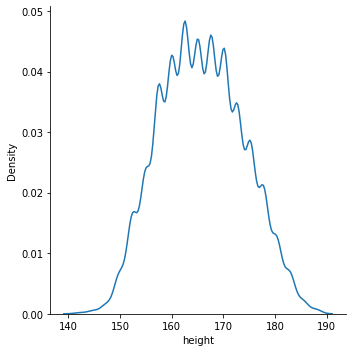

In [ ]:
for i in numeric:
  sns.displot(data=df,x=i,kind='kde')

In [ ]:
df['weight']=replace(df.weight,65)
df['height']=replace(df.height,170)
df['age']=replace(df.age,37)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


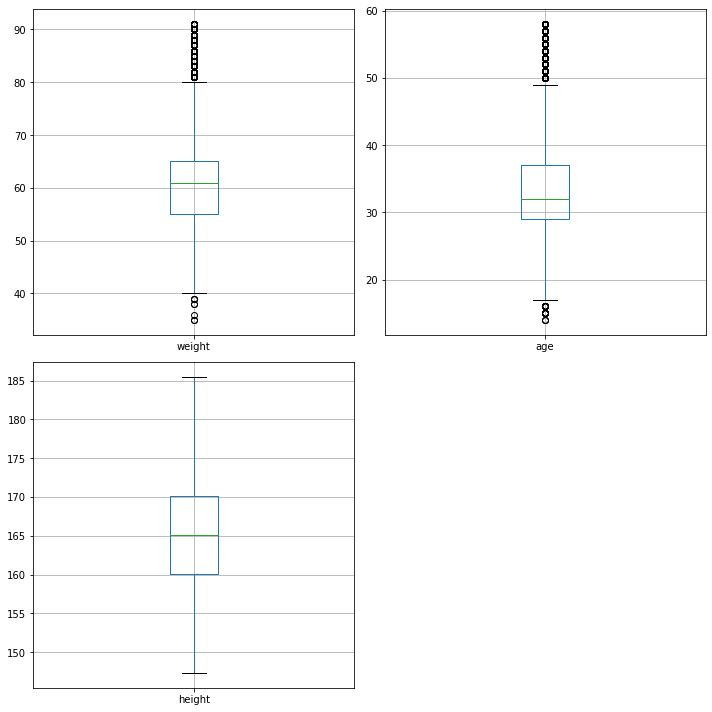

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(10,10))
for i,el in enumerate(list(df.columns.values)[:-1]):
    a = df.boxplot(el, ax=axes.flatten()[i])
fig.delaxes(axes[1,1]) # remove empty subplot
plt.tight_layout() 

plt.show()

In [ ]:
df.isna().sum()

weight      0
age       184
height    254
size        0
dtype: int64

In [ ]:
df.loc[df['size']=='XXS'].count()

weight    2580
age       2566
height    2551
size      2580
dtype: int64

In [ ]:
df['age']=df.age.fillna(df.age.median())
df['height']=df.height.fillna(df.height.mean())

In [ ]:
x=df[numeric]
y=df['size']
xtr,xtst,ytr,ytst=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
tree_model=DecisionTreeClassifier()
tree_model.fit(xtr,ytr)
predicted_y = tree_model.predict(xtst)
accuracy_knn =tree_model.score(xtst,ytst)
print("tree accuracy:",accuracy_knn)
print(classification_report(ytst, predicted_y))

tree accuracy: 0.1781804913646315
              precision    recall  f1-score   support

           L       0.05      0.08      0.06      1252
           M       0.06      0.08      0.07      1449
           S       0.12      0.09      0.10      1256
          XL       0.08      0.06      0.07      1434
         XXL       0.00      0.00      0.00        23
         XXS       0.19      0.12      0.15       767
        XXXL       0.60      0.47      0.52      2041

    accuracy                           0.18      8222
   macro avg       0.16      0.13      0.14      8222
weighted avg       0.22      0.18      0.19      8222



In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=11)
knn_model.fit(xtr,ytr)
predicted_y = knn_model.predict(xtst)
accuracy_knn = knn_model.score(xtst,ytst)
print("KNN accuracy:",accuracy_knn)
print(classification_report(ytst, predicted_y))

KNN accuracy: 0.3219411335441498
              precision    recall  f1-score   support

           L       0.16      0.21      0.18      1252
           M       0.20      0.24      0.22      1449
           S       0.23      0.21      0.22      1256
          XL       0.20      0.14      0.16      1434
         XXL       0.00      0.00      0.00        23
         XXS       0.34      0.28      0.31       767
        XXXL       0.63      0.67      0.65      2041

    accuracy                           0.32      8222
   macro avg       0.25      0.25      0.25      8222
weighted avg       0.32      0.32      0.32      8222



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
nb = GaussianNB()
nb.fit(xtr,ytr)
predicted_y = nb.predict(xtst)
accuracy_nb = nb.score(xtst,ytst)
print("KNN accuracy:",accuracy_nb)
print(classification_report(ytst, predicted_y))

KNN accuracy: 0.472008017594165
              precision    recall  f1-score   support

           0       0.30      0.13      0.18      5342
           1       0.43      0.64      0.51      8853
           2       0.46      0.46      0.46      6584
           3       0.37      0.39      0.38      5672
           4       0.00      0.00      0.00        25
           5       0.54      0.43      0.48      3015
           6       0.74      0.64      0.69      6430

    accuracy                           0.47     35921
   macro avg       0.41      0.38      0.38     35921
weighted avg       0.47      0.47      0.46     35921



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
rtree_model=RandomForestClassifier(n_estimators=10)
rtree_model.fit(xtr,ytr)
predicted_y = rtree_model.predict(xtst)
accuracy_knn =rtree_model.score(xtst,ytst)
print("tree accuracy:",accuracy_knn)
print(classification_report(ytst, predicted_y))

tree accuracy: 0.49845494279112496
              precision    recall  f1-score   support

           0       0.35      0.27      0.30      5342
           1       0.47      0.59      0.52      8853
           2       0.48      0.49      0.49      6584
           3       0.41      0.38      0.40      5672
           4       0.00      0.00      0.00        25
           5       0.53      0.41      0.47      3015
           6       0.71      0.71      0.71      6430

    accuracy                           0.50     35921
   macro avg       0.42      0.41      0.41     35921
weighted avg       0.49      0.50      0.49     35921

